In [1]:
#DATA SOURCE
#https://archive.ics.uci.edu/ml/datasets/automobile

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
df = pd.read_csv("~/Desktop/ML/Data_Science_Machine_Learning/automobile/dataset.csv")

In [4]:
data_types = df.dtypes #check datatypes

In [5]:
data_types

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
df["price"] = df["price"].apply(lambda x: x.replace("?", "0")) # replace "?" with "0"
df["horsepower"] = df["horsepower"].apply(lambda x: x.replace("?", "0")) # replace "?" with "0"




In [7]:

df["price"] = df["price"].astype(float) # convert type from object to float64
df["horsepower"] = df["horsepower"].astype(float) # convert type from object to float64

In [8]:
df = df[df["price"]>0] # get only positive values of price 
df = df[df["horsepower"]>0] # get only positive values of horsepower

In [9]:
#CREATE PRICE INTERVALS FOR CLASSIFICATION
count_intervals = 8
Z = pd.cut(df.price,count_intervals)


In [10]:
#SHOW INTERVALS
Z.dtypes


CategoricalDtype(categories=[(5077.718, 10153.25], (10153.25, 15188.5], (15188.5, 20223.75], (20223.75, 25259.0], (25259.0, 30294.25], (30294.25, 35329.5], (35329.5, 40364.75], (40364.75, 45400.0]]
              ordered=True)

In [11]:
#Prepare intervals to classification

CATS = Z.dtypes.categories
LABELS = [str((x.left, x.right)) for x in CATS]
Y = pd.cut(df.price, count_intervals, labels=LABELS)


In [12]:
#GET ONLY NUMERIC COLUMNS
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
X = df[numerical_columns]
#SHOW FIRST 20 ROWS
X[:20]


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450.0
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,110.0,19,25,15250.0
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,110.0,19,25,17710.0
7,1,105.8,192.7,71.4,55.7,2954,136,8.5,110.0,19,25,18920.0
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,140.0,17,20,23875.0
10,2,101.2,176.8,64.8,54.3,2395,108,8.8,101.0,23,29,16430.0


In [26]:
#First classifier 

from sklearn import tree

In [27]:
my_class = tree.DecisionTreeClassifier()

In [28]:
from sklearn.cross_validation import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, np.array(Y), test_size=0.5)

In [30]:
my_class.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predictions = my_class.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(Y_test, predictions))

0.92


In [34]:
#SHOW DECISION TREE GRAPH
import graphviz 

In [35]:
dot_data = tree.export_graphviz(my_class, out_file=None) 

In [36]:
graph = graphviz.Source(dot_data)

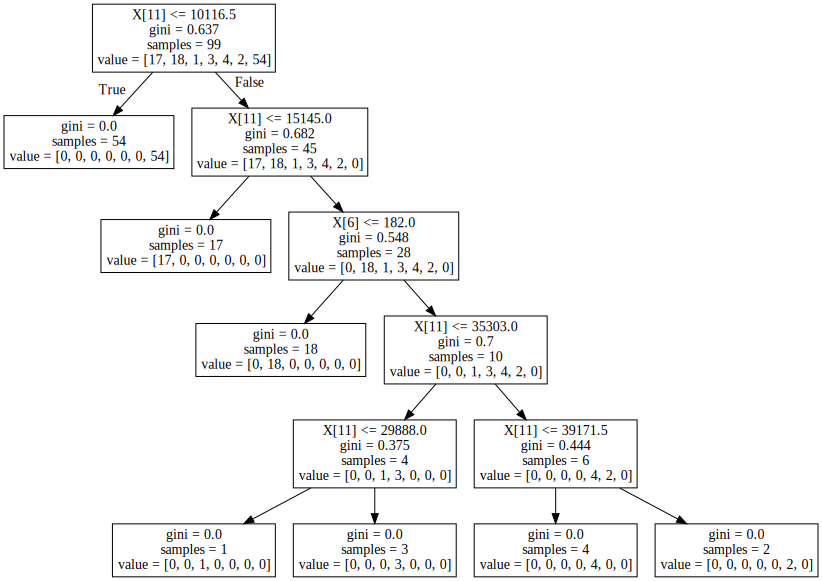

In [37]:
graph